In [1]:
! pip install -q librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import librosa
import numpy as np
import IPython.display as ipd

## Load audio file

In [ ]:

#audio_data = '/content/drive/MyDrive/Colab Notebooks/Lecture_Librosa_Imarticus/audio-data/6ab74e177aa149468a39ca10beed6222.mp3'
#audio_data = '/content/drive/MyDrive/Colab Notebooks/Lecture_Librosa_Imarticus/audio-data/07ab324c602e4afab65ddbcc746c31b5.mp3'
# audio_data = '/content/drive/MyDrive/Colab Notebooks/Lecture_Librosa_Imarticus/audio-data/Normal_mrin_kok.wav'
#audio_data = '/content/drive/MyDrive/Colab Notebooks/Lecture_Librosa_Imarticus/audio-data/NormalSpeech_Spk18_Spk18_s16_2.wav'
# audio_data = '/content/drive/MyDrive/Colab Notebooks/Lecture_Librosa_Imarticus/audio-data/NormalSpeech_Spk19_Spk19_s10.wav'

audio_data = '/content/drive/MyDrive/Colab_Notebooks/Lecture_Librosa_Imarticus/TIMIT_Audio/sa1.wav'

'''
x: Speech Signal (one-dimensional array )
sr : Sampling rate
'''
# x, sr = librosa.load(audio_data)
x, sr = librosa.load(audio_data, sr = 16000)
print(type(x), type(sr))
print('Speech signal shape: ',x.shape,'\n','Sampling Rate: ',sr)



# sr: number of samples per second
# sr = 16000 Hz-> 16000 num of samples per seconds

# num of samples present in speech signal : 58983
# 16000 samples-> 1 sec
# 1 samples -> 1/16000 sec
# 58983 samples -> 58983/16000 sec 


t_speech_sec = len(x)/sr
print('Speech signal duration in sec: ', t_speech_sec)
print('Speech signal duration in msec: ', t_speech_sec*1000)

## Play audio in notebook

In [ ]:
ipd.Audio(audio_data)

##Load Audio with a specific Sampling Rate

In [5]:
x, sr = librosa.load(audio_data, sr=16000, mono=True)
print(type(x), type(sr))
print('Speech signal shape: ',x.shape,'\n','Sampling Rate: ',sr)


<class 'numpy.ndarray'> <class 'int'>
Speech signal shape:  (58983,) 
 Sampling Rate:  16000


In [ ]:
ipd.Audio(audio_data)

In [ ]:
ipd.Audio(audio_data, autoplay=True)

## Visualizing audio

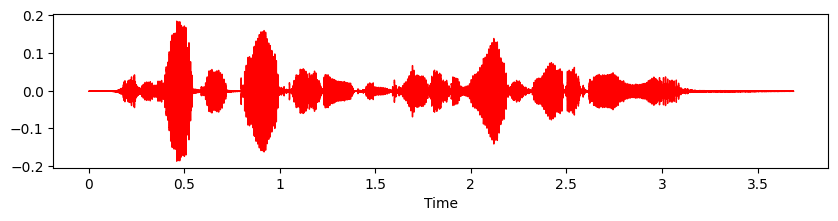

In [6]:
import matplotlib.pyplot as plt
import librosa.display 

#plt.figure()
plt.figure(figsize=(10,2))
librosa.display.waveshow(x, sr=sr, color = 'r')
plt.show()

# Z-Score NOrmalization


In [ ]:
x = x-np.mean(x)
x = np.divide(x, np.std(x))


# Mean-max normalization


In [7]:
x, sr = librosa.load(audio_data, sr = 16000)
x = x-np.mean(x)
x = np.divide(x, np.max(np.abs(x)))

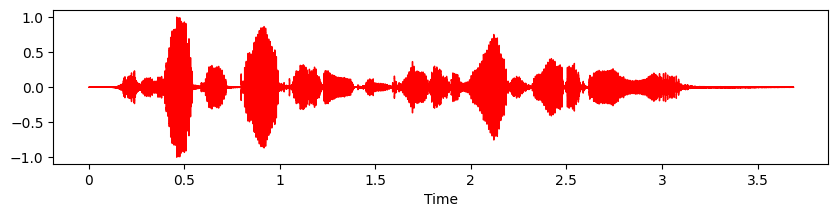

In [8]:
plt.figure(figsize=(10,2))
librosa.display.waveshow(x, sr=sr, color = 'r')
plt.show()

## Load Audio in to samll chunks

Image Credit: https://wiki.aalto.fi/display/ITSP/Windowing

- Hamming window
- Hanning window

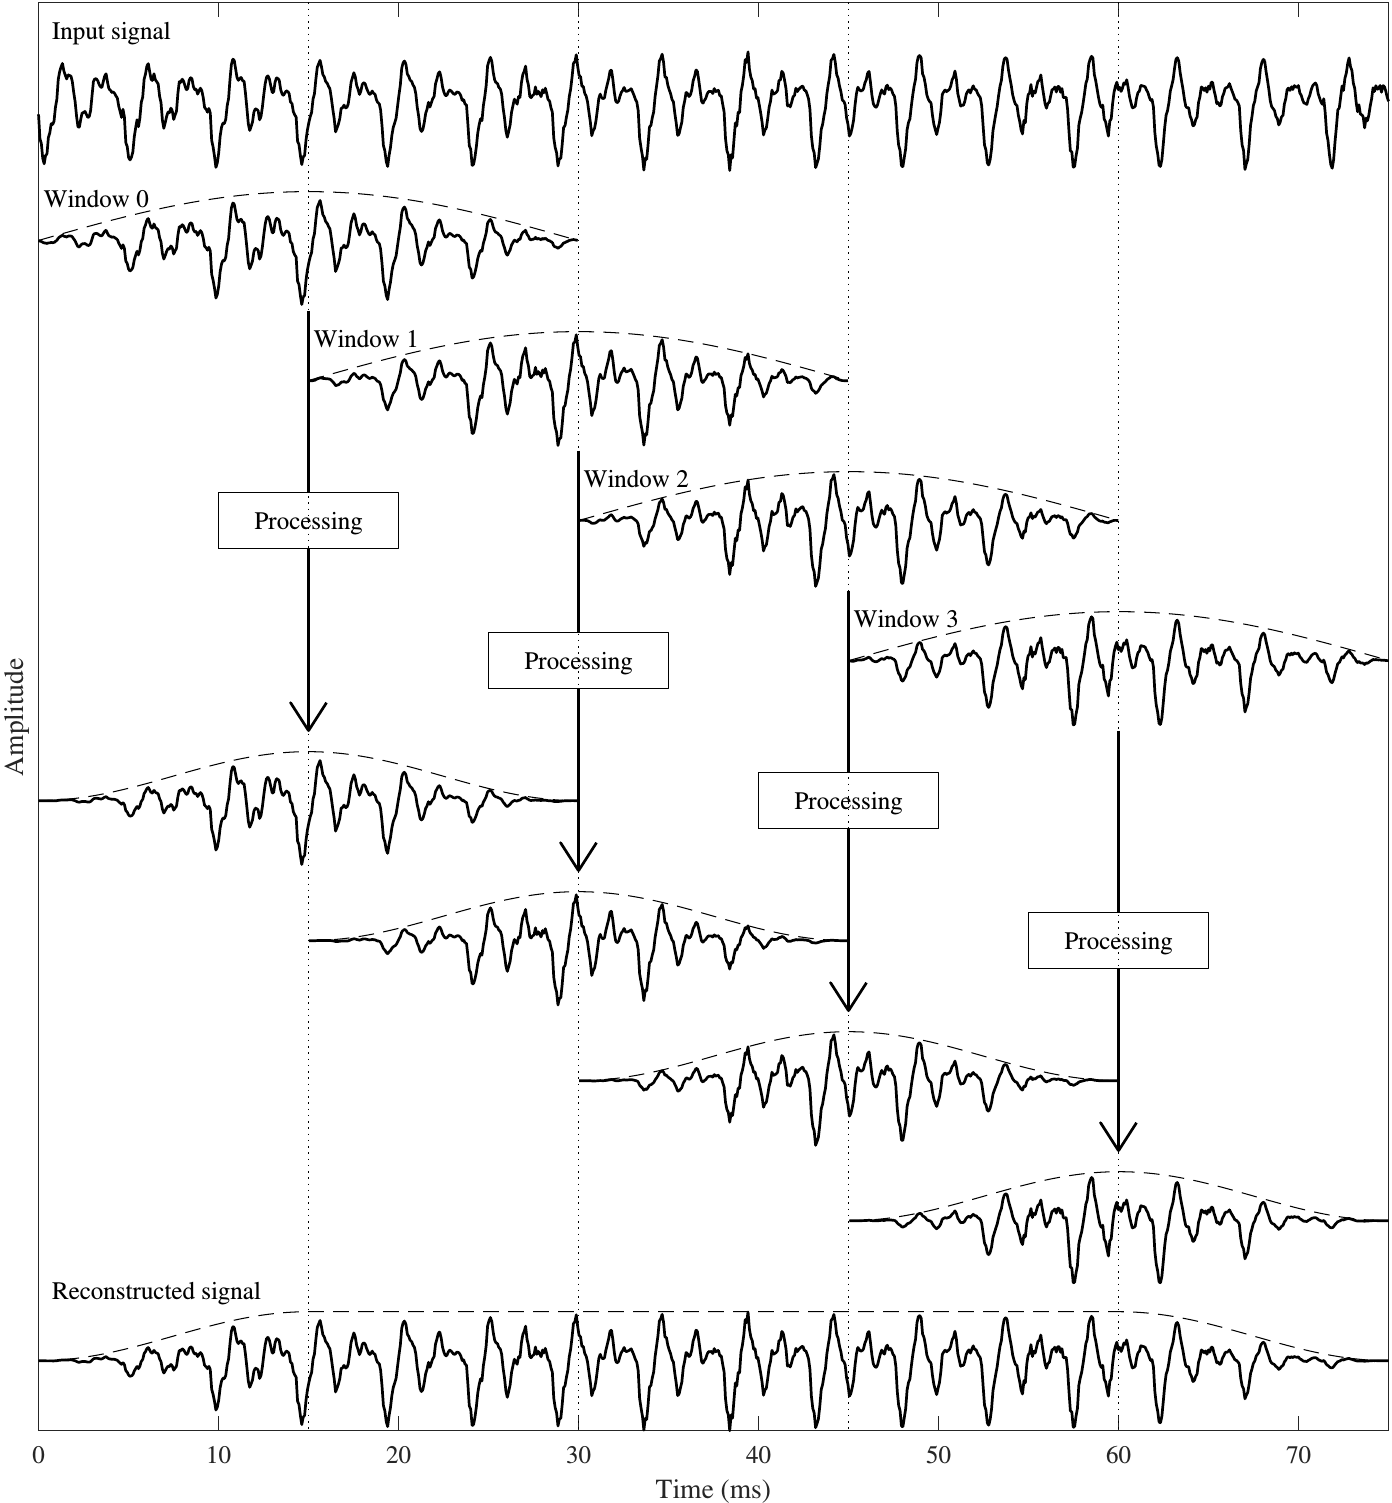









Sampling Rate: Number of samples per seconds

Frame size: A small processing unit

Frame shift: The amount by which a frame is shifted


frame_size = 25 ms

frame_shift = 10 ms

How many samples are present in a frame? 

1 sec -> 16000 samples

1000 msec -> 16000 samples

1 msec - > 16000/1000 = 16 samples

25 ms -> 25*16 

In [ ]:
#y, sr = librosa.load(librosa.ex('trumpet'))
f0, voiced_flag, voiced_probs = librosa.pyin(x,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=500)
times = librosa.times_like(f0)
print('voiced_flag shape', np.shape(voiced_flag), 'f0 shape:', np.shape(f0))
print(voiced_probs)

fo_voiced = np.multiply(f0, voiced_flag)
print('shape f0_voiced ', fo_voiced)


# for i in fo_voiced:

print('Fundamental freq: ', np.mean(fo_voiced))

voiced_flag shape (116,) f0 shape: (116,)
[1.00000000e-02 1.00000000e-02 1.00000000e-02 1.00000000e-02
 0.00000000e+00 1.00000000e-02 1.00000000e-02 1.00000000e-02
 1.00000000e-02 1.00000781e-02 1.39802104e-02 1.03490551e-02
 1.00001278e-02 1.02590506e-02 3.01068618e-02 1.76530609e-01
 1.50464601e-01 1.76530609e-01 1.81873757e-02 1.04675336e-02
 5.60713954e-02 1.06209691e-02 2.61680205e-02 2.79605165e-01
 1.24006461e-02 1.00000000e-02 2.61680286e-02 9.20375708e-02
 3.23336058e-01 1.08579771e-01 8.91144495e-01 6.86082811e-01
 1.76530609e-01 1.00000000e-02 8.40169881e-16 1.00000000e-02
 1.00000008e-02 1.00000029e-02 1.00000008e-02 1.01400460e-02
 3.01068611e-02 8.91144495e-01 9.84878976e-01 6.15949885e-01
 7.79752376e-02 1.06226090e-02 7.79752376e-02 3.48974280e-02
 9.20375708e-02 5.48525054e-01 1.00000015e-02 1.00000004e-02
 1.03490538e-02 1.08244637e-02 6.60815127e-02 4.84986808e-01
 1.50855873e-02 1.00000000e-02 1.00000002e-02 1.00000000e-02
 1.00090255e-02 1.04675336e-02 1.76530609e-

## Zero-Crossing Rate

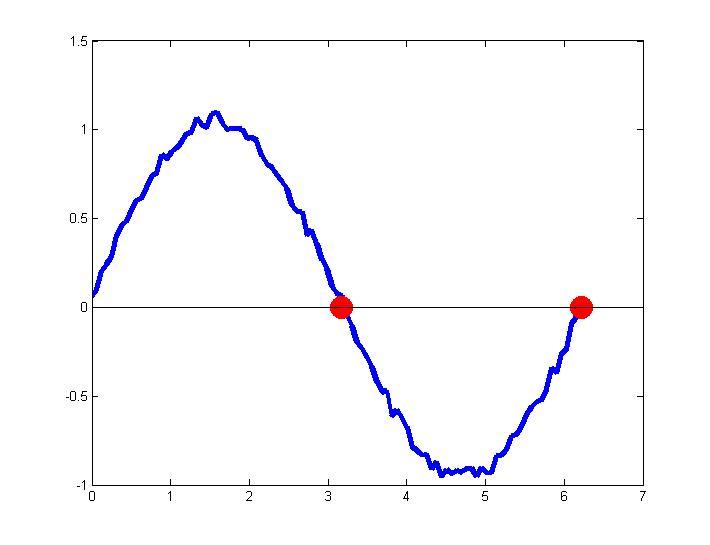

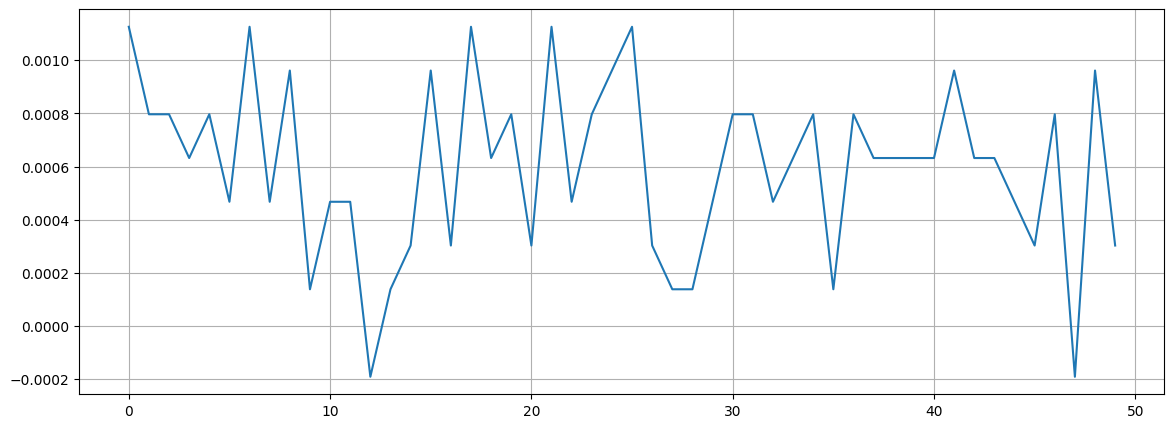

In [9]:
# Zooming in
n0 = 500
n1 = 550
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [12]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))

11212


In [13]:
# audio_data = '/content/drive/MyDrive/Colab Notebooks/Lecture_Librosa_Imarticus/audio-data/NormalSpeech_Spk19_Spk19_s10.wav'

# '''
# x: Speech Signal (one-dimensional array )
# sr : Sampling rate
# '''
# x, sr = librosa.load(audio_data)

# Frame_length = 2048
# hop_size = 512
zcr = np.squeeze(librosa.feature.zero_crossing_rate(x))
print('ZCR: ', zcr)

times = librosa.times_like(zcr)
times_x = librosa.times_like(x)
#t_nsample = np.divide(list(range(0,len(x))),sr)

print('times shape', np.shape(times), 'zcr shape: ', np.shape(zcr))


ZCR:  [0.09082031 0.13476562 0.19873047 0.25488281 0.31103516 0.37646484
 0.41650391 0.37597656 0.28466797 0.20214844 0.14111328 0.125
 0.12792969 0.12353516 0.10253906 0.08056641 0.08056641 0.08984375
 0.08496094 0.08056641 0.07519531 0.05712891 0.04833984 0.06005859
 0.07421875 0.07568359 0.0859375  0.08154297 0.07373047 0.08203125
 0.09619141 0.12060547 0.21533203 0.31445312 0.40380859 0.47851562
 0.47607422 0.38964844 0.28320312 0.171875   0.06787109 0.04638672
 0.05224609 0.06445312 0.06738281 0.07617188 0.06640625 0.05664062
 0.08447266 0.10546875 0.12792969 0.13476562 0.11376953 0.09423828
 0.12158203 0.23242188 0.34130859 0.42626953 0.39111328 0.27734375
 0.15820312 0.06152344 0.05419922 0.05566406 0.0703125  0.08007812
 0.08154297 0.10791016 0.17871094 0.25292969 0.29638672 0.27636719
 0.19482422 0.11328125 0.06933594 0.06494141 0.07421875 0.07324219
 0.06884766 0.06640625 0.05908203 0.05957031 0.05859375 0.05566406
 0.05664062 0.0546875  0.05712891 0.05908203 0.06054688 0.062

In [ ]:
zcr = np.squeeze(librosa.feature.zero_crossing_rate(x, frame_length=2048, hop_length=1024))
print('ZCR: ', zcr)

times = librosa.times_like(zcr)
times_x = librosa.times_like(x)
#t_nsample = np.divide(list(range(0,len(x))),sr)

print('times shape', np.shape(times), 'zcr shape: ', np.shape(zcr))


ZCR:  [0.04492188 0.12548828 0.28466797 0.41748047 0.28466797 0.14208984
 0.12890625 0.10253906 0.07861328 0.08300781 0.07519531 0.04931641
 0.07617188 0.08691406 0.07373047 0.09619141 0.21533203 0.40380859
 0.47607422 0.28320312 0.06787109 0.05419922 0.06835938 0.06445312
 0.08447266 0.12890625 0.11376953 0.12158203 0.34130859 0.39111328
 0.15820312 0.05517578 0.07128906 0.08154297 0.17773438 0.29443359
 0.19287109 0.06835938 0.07324219 0.06787109 0.06005859 0.05957031
 0.05664062 0.05712891 0.06054688 0.06445312 0.0703125  0.07421875
 0.11376953 0.18310547 0.26611328 0.42431641 0.52148438 0.52636719
 0.51513672 0.48144531 0.46044922 0.34472656]
times shape (58,) zcr shape:  (58,)


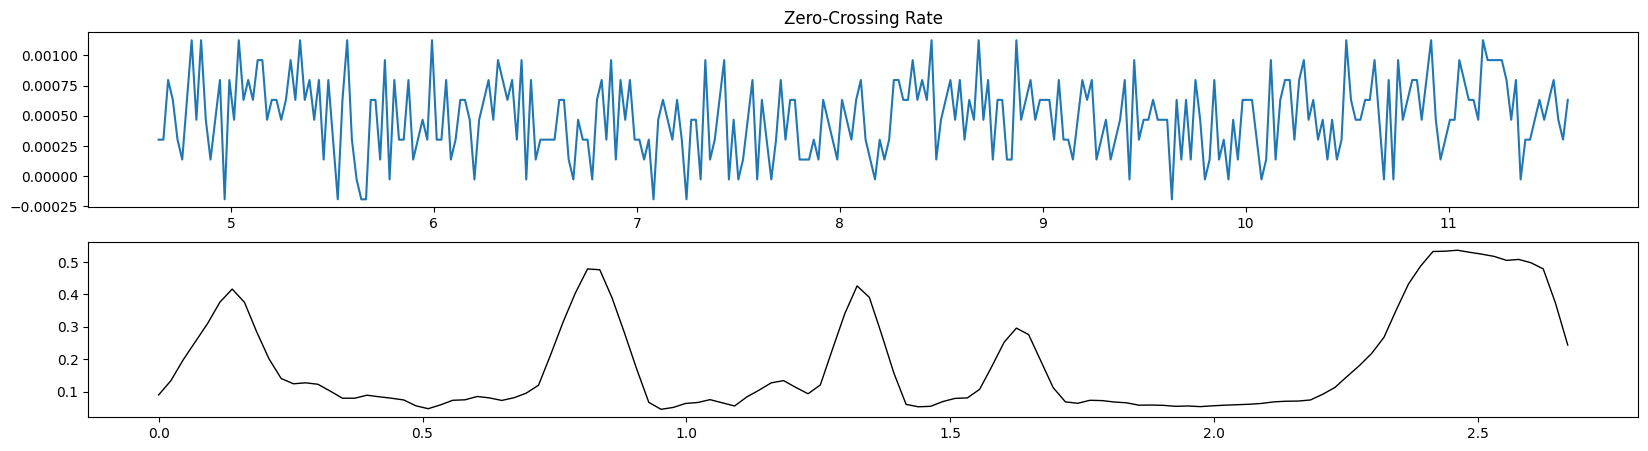

In [53]:
import matplotlib.pyplot as plt
import librosa.display 
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(20,5))
#librosa.display.waveshow(x, sr=sr)
ax1.plot(times_x, x)
ax2.plot(times, zcr, color='k', linewidth=1)
ax1.set(title='Zero-Crossing Rate')
plt.show()


## Construct a pure tone (cosine) signal at a given frequency.

16000


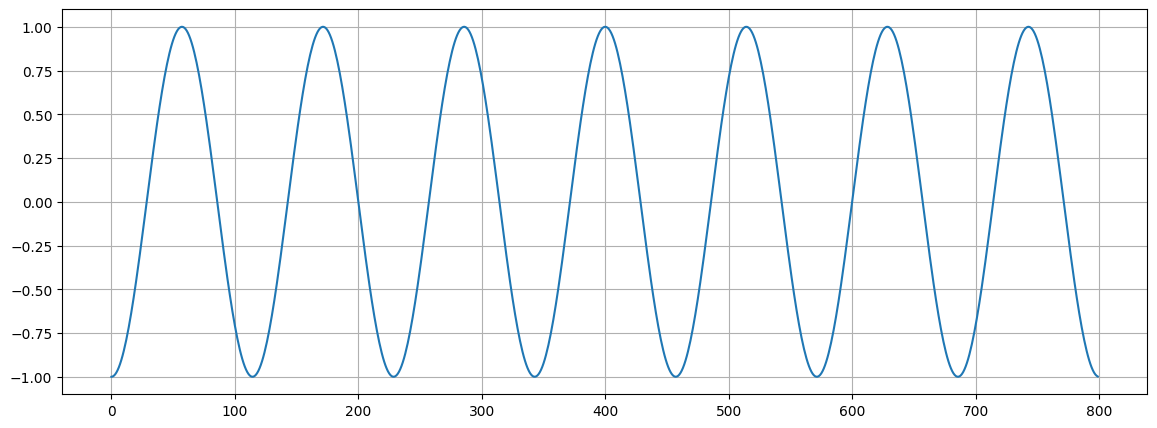

In [67]:
import matplotlib.pyplot as plt
import librosa.display 

# tone = librosa.tone(140, duration=1)
tone = librosa.tone(140, sr=16000,length=16000)
plt.figure(figsize=(14, 5))
plt.plot(tone[200:1000])
plt.grid()
print(len(tone))

[[-24.03352803 -30.06194626 -80.         ... -80.         -34.2537625
  -24.37166304]
 [-23.38967955 -29.42650401 -80.         ... -80.         -33.66094134
  -23.72740714]
 [-22.45179447 -28.4946444  -78.55003835 ... -78.33636519 -32.65219153
  -22.78601525]
 ...
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]]


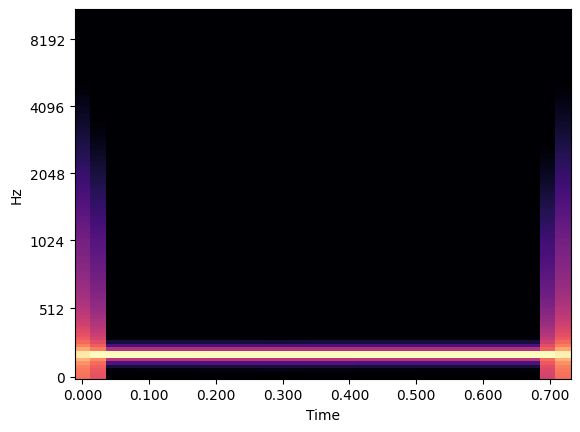

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=20*tone)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),x_axis='time', y_axis='mel', ax=ax)
#librosa.display.specshow(S,x_axis='time', y_axis='mel', ax=ax)
#librosa.display.specshow(S,x_axis='time', y_axis='mel', ax=ax)
print(librosa.power_to_db(S, ref=np.max))


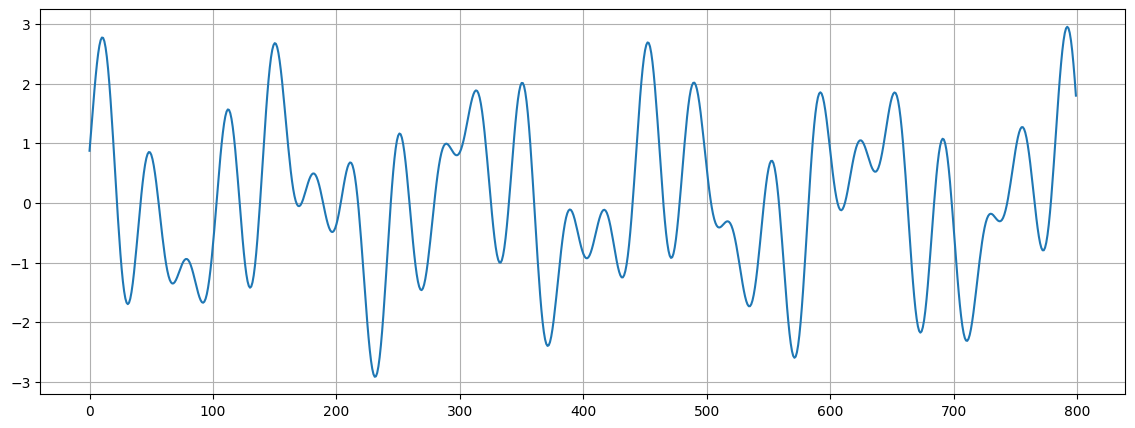

In [54]:
tone1 = librosa.tone(140, duration=1)
tone2 = librosa.tone(450, duration=1)
tone3 = librosa.tone(650, duration=1)
# tone = 0.05*tone1 + 8*tone2 + 1.95*tone3 
tone = tone1 + tone2 +tone3 
plt.figure(figsize=(14, 5))
plt.plot(tone[200:1000])
plt.grid()

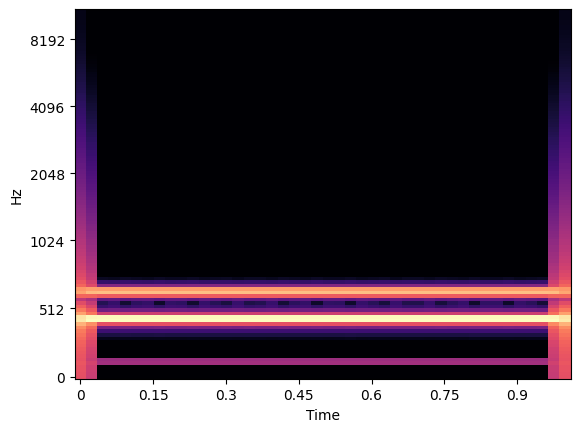

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=tone)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),x_axis='time', y_axis='mel', ax=ax)
#librosa.display.specshow(S,x_axis='time', y_axis='mel', ax=ax)

### Spectrogram

X shape: (1025, 91)


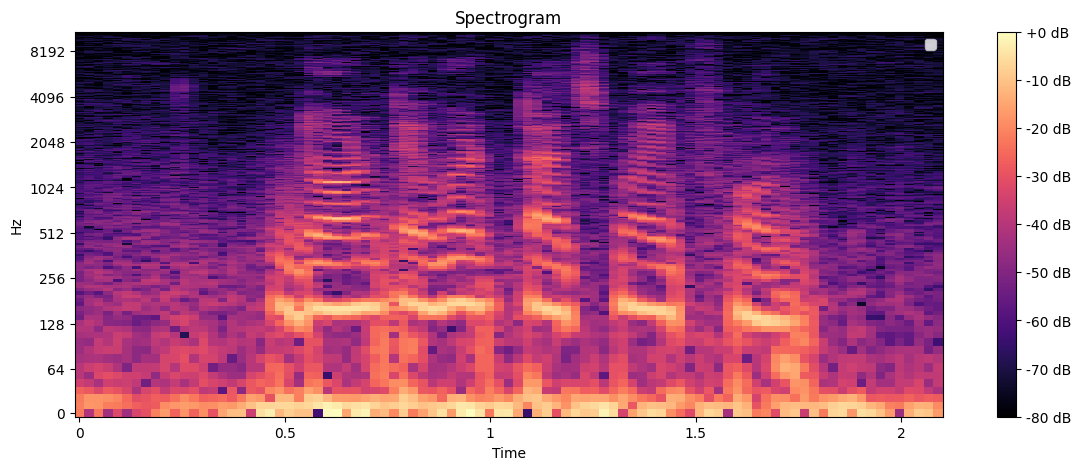

In [ ]:
X = librosa.stft(x)
print('X shape:', np.shape(abs(X)))

Xdb = librosa.amplitude_to_db(abs(X), ref=np.max)
fig, ax = plt.subplots(figsize=(14,5))

img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")
#ax.plot(times, f0, label='f0', color='cyan', linewidth=5)
ax.legend(loc='upper right')
plt.show()

## Create a Audio Signal

In [86]:
import soundfile as sf
import numpy as np

sr = 22050
T = 5.0
t = np.linspace(0 ,T, int(T*sr))
x = 0.5*np.sin(2*np.pi*2120*t)

ipd.Audio(x, rate=sr)
sf.write('/content/drive/MyDrive/Colab_Notebooks/Lecture_Librosa_Imarticus/audio-data/tone_220.wav', x, sr)

In [87]:
ipd.Audio('/content/drive/MyDrive/Colab_Notebooks/Lecture_Librosa_Imarticus/audio-data/tone_220.wav', autoplay=True)

## Add multiple frequency signal and create an audio signal


## Generate a given tone audio
Construct a pure tone (cosine) signal at a given frequency.

# Record an audio signal